# State of Data Brazil

A State of Data Brazil foi realizada entre 18 de outubro de 2021 e 6 de dezembro de 2021 através de um questionário online e reuniu indicadores relacionados a perfil demográfico, formação, atuação no setor, remuneração, rotatividade e fatores de satisfação no ambiente de trabalho, incluindo o impacto do trabalho remoto nas preferências profissionais de 2.645 respondentes de todo o Brasil. A amostra reflete a visão de variados papéis de atuação em empresas, como os de analista de dados, cientista de dados e engenheiro de dados, bem como diferentes perfis de experiência profissional, incluindo analistas júnior, pleno, sênior e gestores.

Relatório: https://www.stateofdata.com.br

# Importação e primeiras analises do dado

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('State of Data.csv')
data

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')","('P9_a_a ', 'Blog/Medium do Data Hackers')","('P9_a_b ', 'Podcast do Data Hackers')","('P9_a_d ', 'Newsletter Semanal')","('P9_a_e ', 'Canal do Slack')","('P9_a_f ', 'Canal do Youtube do Data Hackers')","('P9_a_g ', 'Ainda não conhecia o Data Hackers')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Podcast do Data Hackers",0,1,1,0,0,0
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Blog/Medium do Data Hackers",1,0,1,0,0,0
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,0,0,0,0
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,Ainda não conhecia o Data Hackers,0,0,0,0,0,1
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Podcast do Data Hackers, Canal do Slack, Newsl...",0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,07nvo8cdy377a46gon207nvjebwe65zg,40.0,40-44,Masculino,São Paulo (SP),SP,Sudeste,Sudeste,1,Não tenho graduação formal,...,NaN,NaN,NaN,Ainda não conhecia o Data Hackers,0,0,0,0,0,1
2641,01mqnby32u01pg3nuj6vipp4mc06s8pg,27.0,25-29,Masculino,Santa Catarina (SC),SC,Sul,Sul,1,Graduação/Bacharelado,...,0.0,0.0,0.0,Blog/Medium do Data Hackers,1,0,0,0,0,0
2642,01fncs8qbhl9zx01fncs8rqib2zl3d18,24.0,22-24,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Graduação/Bacharelado,...,NaN,NaN,NaN,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,1,1,0,0
2643,075h3v2z19if04yn7o075h3vhifl38rw,38.0,35-39,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Graduação/Bacharelado,...,NaN,NaN,NaN,Blog/Medium do Data Hackers,1,0,0,0,0,0


In [3]:
data.shape

(2645, 356)

Como temos muitas colunas - 356, não conseguimos imprimir todas elas de forma simples. Para isso fazemos: 

In [4]:
# Analisando todas as colunas

with pd.option_context('display.max_rows', 2, 'display.max_columns', None): 
    display(data)

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_b ', 'Salário atual não corresponde ao mercado')","('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_e ', 'Gostaria de receber mais benefícios')","('P2_l_f ', 'O clima de trabalho/ambiente não é bom')","('P2_l_g ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_a ', 'Remuneração/Salário')","('P2_o_b ', 'Benefícios')","('P2_o_c ', 'Propósito do trabalho e da empresa')","('P2_o_d ', 'Flexibilidade de trabalho remoto')","('P2_o_e ', 'Ambiente e clima de trabalho')","('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_i ', 'Qualidade dos gestores e líderes')","('P2_o_j ', 'Reputação que a empresa tem no mercado')","('P2_q ', 'Atualmente qual a sua forma de trabalho?')","('P2_r ', 'Qual a forma de trabalho ideal para você?')","('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_b_a ', 'Analytics Engineer')","('P3_b_b ', 'Engenharia de Dados/Data Engineer')","('P3_b_c ', 'Analista de Dados/Data Analyst')","('P3_b_d ', 'Cientista de Dados/Data Scientist')","('P3_b_e ', 'Database Administrator/DBA')","('P3_b_f ', 'Analista de Business Intelligence/BI')","('P3_b_g ', 'Arquiteto de Dados/Data Architect')","('P3_b_h ', 'Data Product Manager/DPM')","('P3_b_i ', 'Business Analyst')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_c_a ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_b ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_c ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_d ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_e ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_f ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.')","('P3_c_g ', 'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.')","('P3_c_h ', 'Apesar de ser gestor ainda atuo na part

In [5]:
colunas = data.columns.values.tolist()

## Organizando e identificando melhor as colunas

In [6]:
names_columns = []

for i in range(0, len(colunas)):
    names_columns.append(eval(colunas[i]))

In [7]:
df = pd.DataFrame(names_columns)
df.rename(columns = {0:'Categorias', 1:'Perguntas'}, inplace = True)

In [8]:
df

,Categorias,Perguntas
0,P0,id
1,P1_a,Idade
2,P1_a_a,Faixa idade
3,P1_b,Genero
4,P1_e,Estado onde mora
...,...,...
351,P9_a_b,Podcast do Data Hackers
352,P9_a_d,Newsletter Semanal
353,P9_a_e,Canal do Slack
354,P9_a_f,Canal do Youtube do Data Hackers


**Podemos perceber que o dado é dividido em categorias, de P0 a P9. Cada categoria é relacionada com um tipo de pergunta diferente.**

- P0: Id de cada usuário que respondeu ao questionário.
- P1: Perguntas pessoais e demográficas: Idade, Estado, Genero, ... **df_1**
- P2: Perguntas relacionadas ao emprego atual: Salario, Cargo, Nível, ... **df_2**
- P3: Perguntas mais específicas sobre o emprego atual: Nível da equipe, ... **df_3**
- P4: Perguntas sobre como é a analise de dados na empresa, que tipo de dado é utilizado. **df_4**
- P5: Perguntas sobre novas oportunidades (Apenas 3 perguntas (?)) **df_5**
- P6: Perguntas sobre rotina de trabalho relacionada a Engenharia de Dados e ferramentas utilizadas **df_6**
- P7: Perguntas sobre rotina de trabalho relacionada a Análise de Dados e ferramentas utilizadas **df_7**
- P8: Perguntas sobre rotina de trabalho relacionada a Ciencia de Dados e ferramentas utilizadas **df_8**
- P9: Perguntas sobre interação com Data Hackers **df_9**

Há a necessidade de dividir os dados em diferentes dataframes?

In [9]:
df_1 = data.loc[:,"('P1_a ', 'Idade')":"('P1_i ', 'Área de Formação')"]
df_1.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [10]:
df_2 = data.loc[:,"('P2_a ', 'Qual sua situação atual de trabalho?')":"('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')"]
df_2.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [11]:
df_3 = data.loc[:,"('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')":"('P3_d_n ', 'Dividir o tempo entre entregas técnicas e gestão.')"]
df_3.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [12]:
df_4 = data.loc[:,"('P4_a_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?')":"('P4_h_x ', 'Não utilizo nenhuma ferramenta de BI no trabalho')"]
df_4.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [13]:
df_5 = data.loc[:,"('P5_b ', 'Qual oportunidade você está buscando?')":"('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')"]
df_5.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [14]:
df_6 = data.loc[:,"('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')":"('P6_h_h ', 'Cuidando da qualidade dos dados, metadados e dicionário de dados.')"]
df_6.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [15]:
df_7 = data.loc[:,"('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')":"('P7_d_h ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')"]
df_7.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [16]:
df_8 = data.loc[:,"('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')":"('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"]
df_8.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [17]:
df_9 = data.loc[:,"('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')":"('P9_a_g ', 'Ainda não conhecia o Data Hackers')"]
df_9.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

# Limpeza dos dados

**Faz sentido fazer limpeza de dados? Não tenho certeza...**

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ('P0', 'id')                     2645 non-null   object 
 1   ('P1_a ', 'Idade')               2617 non-null   float64
 2   ('P1_a_a ', 'Faixa idade')       2645 non-null   object 
 3   ('P1_b ', 'Genero')              2645 non-null   object 
 4   ('P1_e ', 'Estado onde mora')    2609 non-null   object 
 5   ('P1_e_a ', 'uf onde mora')      2609 non-null   object 
 6   ('P1_e_b ', 'Regiao onde mora')  2645 non-null   object 
 7   ('P1_g_b ', 'Regiao de origem')  484 non-null    object 
 8   ('P1_g_c ', 'Mudou de Estado?')  2645 non-null   int64  
 9   ('P1_h ', 'Nivel de Ensino')     2645 non-null   object 
 10  ('P1_i ', 'Área de Formação')    2581 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 227.4+ KB


In [19]:
df_1.describe()

,"('P1_a ', 'Idade')","('P1_g_c ', 'Mudou de Estado?')"
count,2617.00000,2645.000000
mean,31.15705,0.182987
std,7.13062,0.386729
min,18.00000,0.000000
25%,26.00000,0.000000
50%,30.00000,0.000000
75%,35.00000,0.000000
max,54.00000,1.000000


In [20]:
df_1.isnull().sum()

('P0', 'id')                          0
('P1_a ', 'Idade')                   28
('P1_a_a ', 'Faixa idade')            0
('P1_b ', 'Genero')                   0
('P1_e ', 'Estado onde mora')        36
('P1_e_a ', 'uf onde mora')          36
('P1_e_b ', 'Regiao onde mora')       0
('P1_g_b ', 'Regiao de origem')    2161
('P1_g_c ', 'Mudou de Estado?')       0
('P1_h ', 'Nivel de Ensino')          0
('P1_i ', 'Área de Formação')        64
dtype: int64

In [21]:
df_1.isna().sum()

('P0', 'id')                          0
('P1_a ', 'Idade')                   28
('P1_a_a ', 'Faixa idade')            0
('P1_b ', 'Genero')                   0
('P1_e ', 'Estado onde mora')        36
('P1_e_a ', 'uf onde mora')          36
('P1_e_b ', 'Regiao onde mora')       0
('P1_g_b ', 'Regiao de origem')    2161
('P1_g_c ', 'Mudou de Estado?')       0
('P1_h ', 'Nivel de Ensino')          0
('P1_i ', 'Área de Formação')        64
dtype: int64

# Visualização de dados

In [22]:
df_1

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,Química / Física
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,Economia/ Administração / Contabilidade / Fina...
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Computação / Engenharia de Software / Sistemas...
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,Outras
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Outras Engenharias
...,...,...,...,...,...,...,...,...,...,...,...
2640,07nvo8cdy377a46gon207nvjebwe65zg,40.0,40-44,Masculino,São Paulo (SP),SP,Sudeste,Sudeste,1,Não tenho graduação formal,NaN
2641,01mqnby32u01pg3nuj6vipp4mc06s8pg,27.0,25-29,Masculino,Santa Catarina (SC),SC,Sul,Sul,1,Graduação/Bacharelado,Estatística/ Matemática / Matemática Computaci...
2642,01fncs8qbhl9zx01fncs8rqib2zl3d18,24.0,22-24,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...
2643,075h3v2z19if04yn7o075h3vhifl38rw,38.0,35-39,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...


Text(0.5, 0, 'Idades')

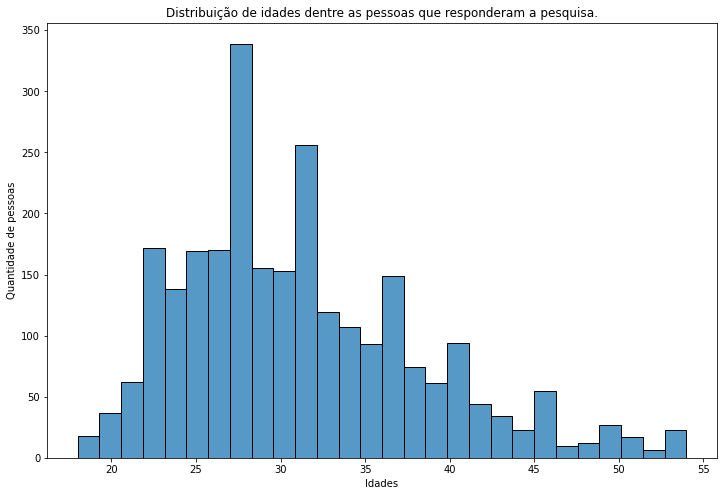

In [23]:
ax = sns.histplot(df_1["('P1_a ', 'Idade')"]);
ax.set_title('Distribuição de idades dentre as pessoas que responderam a pesquisa.')
ax.figure.set_size_inches(12, 8)
ax.set_ylabel('Quantidade de pessoas')
ax.set_xlabel('Idades')

In [24]:
df_1["('P1_b ', 'Genero')"].value_counts()

Masculino    2144
Feminino      493
Outro           8
Name: ('P1_b ', 'Genero'), dtype: int64

Text(0.5, 0, 'Gêneros')

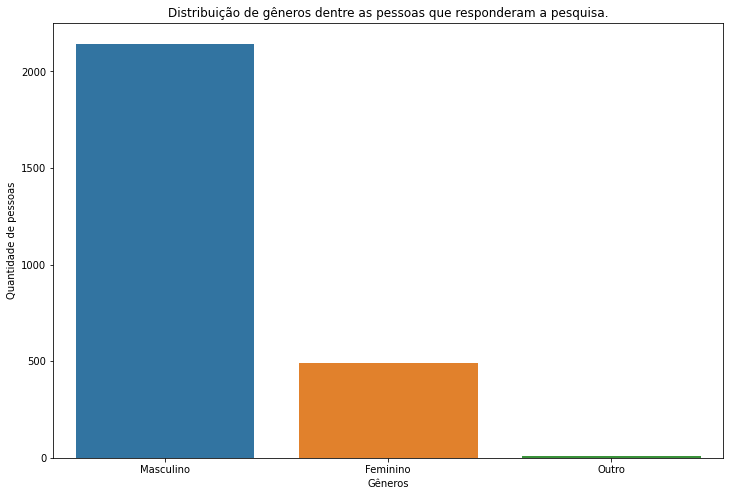

In [25]:
ax = sns.countplot(df_1["('P1_b ', 'Genero')"]);
ax.set_title('Distribuição de gêneros dentre as pessoas que responderam a pesquisa.')
ax.figure.set_size_inches(12, 8)
ax.set_ylabel('Quantidade de pessoas')
ax.set_xlabel('Gêneros')

**Imprimindo mapas relacionados aos estados.**

In [26]:
# Longitude e Latitude de todos os estados
state_dict = {'AC': [ -8.77, -70.55], 'AL': [ -9.71, -35.73], 'AM': [ -3.07, -61.66], 'AP': [  1.41, -51.77], 'BA': [-12.96, -38.51], 'CE': [ -3.71, -38.54], 'DF': [-15.83, -47.86], 'ES': [-19.19, -40.34], 'GO': [-16.64, -49.31], 'MA': [ -2.55, -44.30], 'MT': [-12.64, -55.42], 'MS': [-20.51, -54.54], 'MG': [-18.10, -44.38], 'PA': [ -5.53, -52.29], 'PB': [ -7.06, -35.55], 'PR': [-24.89, -51.55], 'PE': [ -8.28, -35.07], 'PI': [ -8.28, -43.68], 'RJ': [-22.84, -43.15], 'RN': [ -5.22, -36.52], 'RO': [-11.22, -62.80], 'RS': [-30.01, -51.22], 'RR': [  1.89, -61.22], 'SC': [-27.33, -49.44], 'SE': [-10.90, -37.07], 'SP': [-23.55, -46.64], 'TO': [-10.25, -48.25]}

In [27]:
def categorise(row): 
    if row["('P1_e_a ', 'uf onde mora')"] == 'CE':
        return -3.71, -38.54
    if row["('P1_e_a ', 'uf onde mora')"] == 'BA':
        return -12.96, -38.51
    if row["('P1_e_a ', 'uf onde mora')"] == 'SC':
        return -27.33, -49.44
    if row["('P1_e_a ', 'uf onde mora')"] == 'SP':
        return -23.55, -46.64
    if row["('P1_e_a ', 'uf onde mora')"] == 'MG':
        return -18.10, -44.38
    if row["('P1_e_a ', 'uf onde mora')"] == 'GO':
        return -16.64, -49.31
    if row["('P1_e_a ', 'uf onde mora')"] == 'PR':
        return -24.89, -51.55
    if row["('P1_e_a ', 'uf onde mora')"] == 'MT':
        return -12.64, -55.42
    if row["('P1_e_a ', 'uf onde mora')"] == 'MS':
        return -20.51, -54.54
    if row["('P1_e_a ', 'uf onde mora')"] == 'DF':
        return -15.83, -47.86
    if row["('P1_e_a ', 'uf onde mora')"] == 'SE':
        return -10.90, -37.07
    if row["('P1_e_a ', 'uf onde mora')"] == 'RS':
        return -30.01, -51.22
    if row["('P1_e_a ', 'uf onde mora')"] == 'RJ':
        return -22.84, -43.15
    if row["('P1_e_a ', 'uf onde mora')"] == 'PI':
        return -8.28, -43.68
    if row["('P1_e_a ', 'uf onde mora')"] == 'RN':
        return -5.22, -36.52
    if row["('P1_e_a ', 'uf onde mora')"] == 'AL':
        return -9.71, -35.73
    if row["('P1_e_a ', 'uf onde mora')"] == 'PE':
        return -8.28, -35.07
    if row["('P1_e_a ', 'uf onde mora')"] == 'ES':
        return -19.19, -40.34
    if row["('P1_e_a ', 'uf onde mora')"] == 'PB':
        return -7.06, -35.55
    if row["('P1_e_a ', 'uf onde mora')"] == 'MA':
        return -2.55, -44.30
#     else:
#         return Null

In [28]:
df_1['lat_lon'] = df_1.apply(lambda row: categorise(row), axis=1)

In [29]:
df_1

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')",lat_lon
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,Química / Física,"(-3.71, -38.54)"
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,"(-12.96, -38.51)"
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Computação / Engenharia de Software / Sistemas...,"(-27.33, -49.44)"
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,Outras,"(-23.55, -46.64)"
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Outras Engenharias,"(-27.33, -49.44)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2640,07nvo8cdy377a46gon207nvjebwe65zg,40.0,40-44,Masculino,São Paulo (SP),SP,Sudeste,Sudeste,1,Não tenho graduação formal,NaN,"(-23.55, -46.64)"
2641,01mqnby32u01pg3nuj6vipp4mc06s8pg,27.0,25-29,Masculino,Santa Catarina (SC),SC,Sul,Sul,1,Graduação/Bacharelado,Estatística/ Matemática / Matemática Computaci...,"(-27.33, -49.44)"
2642,01fncs8qbhl9zx01fncs8rqib2zl3d18,24.0,22-24,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,"(-27.33, -49.44)"
2643,075h3v2z19if04yn7o075h3vhifl38rw,38.0,35-39,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,"(-22.84, -43.15)"


In [45]:
import geobr
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [46]:
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

In [ ]:
states = geobr.read_state(year=2019)